# K Means Color Quantization

## Imports

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.image as mpimg

### matplotlib.image
It has functions to read Jpeg and RGB files and convert them into NumPy Array.

In [5]:
image_array = mpimg.imread('palm_trees.jpg')

In [7]:
image_array.shape # 3 color channels | (height, width, 3)

(1401, 934, 3)

In [8]:
image_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

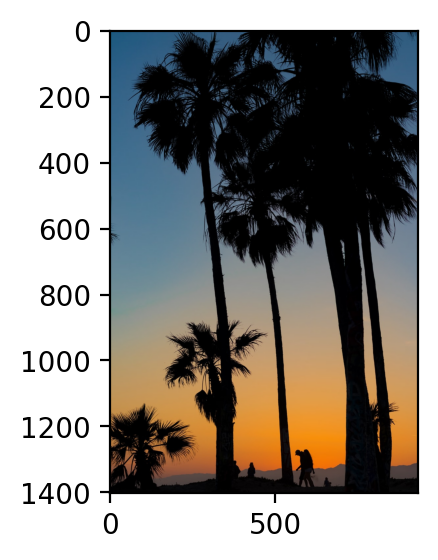

In [12]:
plt.figure(figsize=(3,3), dpi=200)
plt.imshow(image_array)              # plt.imshow() accepts an array (not JPeg or RGB files).

# Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. We will start with just 6 colors (k=6).

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using **(h,w,c) ---> (h * w,c)**

In [13]:
(h, w, c) = image_array.shape

In [14]:
image_array_2d = image_array.reshape(h*w, c)

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=6)

In [17]:
labels = model.fit_predict(image_array_2d)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
model.cluster_centers_

array([[  2.77093259,   2.57134729,   3.68130681],
       [ 71.86405141, 109.67458171, 137.76339581],
       [193.64064382, 154.49643907, 107.11734885],
       [138.87650112, 144.40737453, 143.26468223],
       [219.27395722, 134.60424942,  45.44964195],
       [ 67.30637037,  61.70641735,  62.03318284]])

**RGB Color codes are INTEGERs**

In [19]:
RGB_Codes = model.cluster_centers_.round(0).astype(int)

In [20]:
RGB_Codes

array([[  3,   3,   4],
       [ 72, 110, 138],
       [194, 154, 107],
       [139, 144, 143],
       [219, 135,  45],
       [ 67,  62,  62]])

In [21]:
RGB_Codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [22]:
RGB_Codes[labels].reshape( (h, w, c) )

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [23]:
quantized_image = np.reshape(RGB_Codes[labels], (h, w, c))

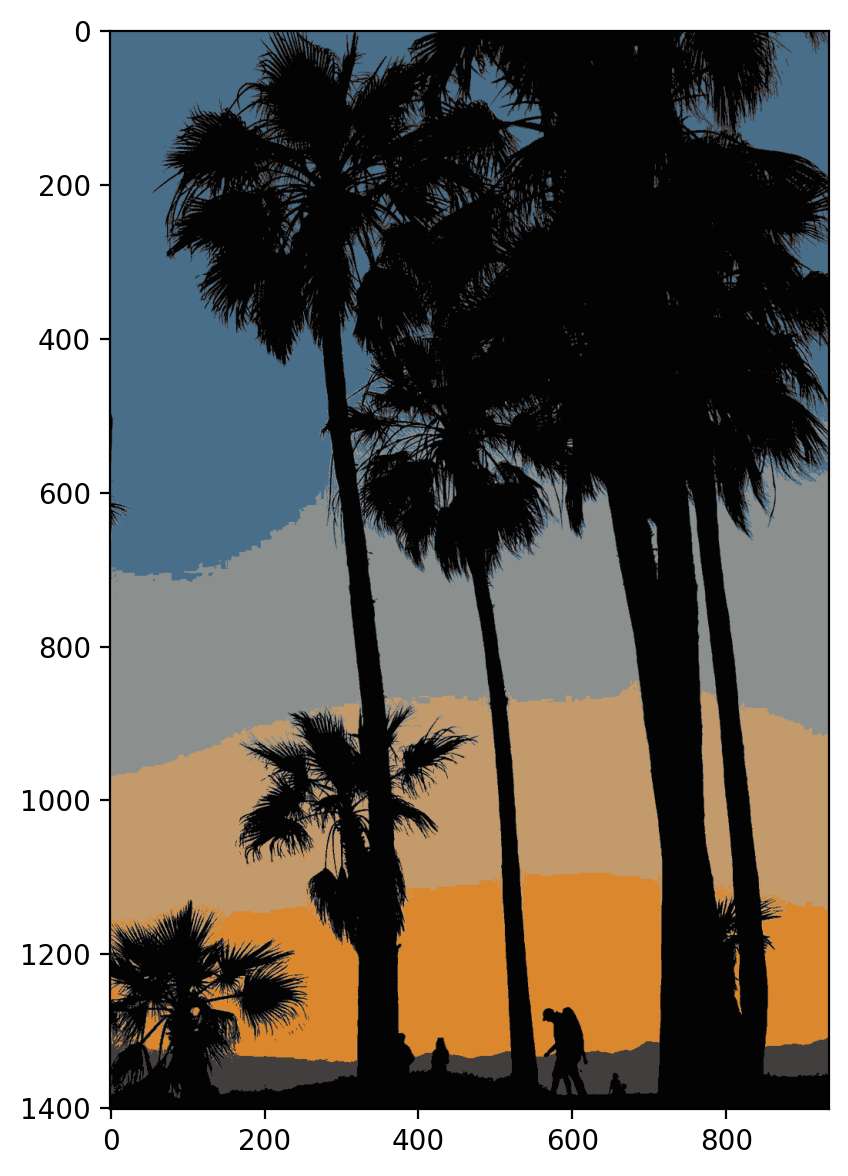

In [27]:
plt.figure(figsize=(6,7), dpi=200)
plt.imshow(quantized_image)              # plt.imshow() accepts an array (not JPeg or RGB files).